**covid19 prediction using cnn and transfer learning models**

**Data Augmentation and preprocessing**

In [4]:
# import the nececessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# data augmentation for the training variable
train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)

In [6]:
# data augmentation for the testing variable
test_datagen = ImageDataGenerator(rescale =1./255)

In [7]:
# data augmentation on the training data
x_train = train_datagen.flow_from_directory(r'C:\Users\91830\Documents\dl_project\Data\train',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 4271 images belonging to 3 classes.


In [8]:
# data augmentation on the testing data
x_test = test_datagen.flow_from_directory(r'C:\Users\91830\Documents\dl_project\Data\test',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 1247 images belonging to 3 classes.


##**CNN Model building**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [10]:
# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(3,activation ='softmax')) # output layer


In [11]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])

In [12]:
#traing the model
his=model.fit(x_train,validation_data=x_test,epochs=30,steps_per_epoch=len(x_train),validation_steps =len(x_test))

Epoch 1/30
43/43 [==============================] - 116s 3s/step - loss: 0.6973 - accuracy: 0.7057 - val_loss: 0.5444 - val_accuracy: 0.7682
Epoch 2/30
43/43 [==============================] - 46s 1s/step - loss: 0.3642 - accuracy: 0.8593 - val_loss: 0.2319 - val_accuracy: 0.9062
Epoch 3/30
43/43 [==============================] - 46s 1s/step - loss: 0.3006 - accuracy: 0.8813 - val_loss: 0.2325 - val_accuracy: 0.9070
Epoch 4/30
43/43 [==============================] - 50s 1s/step - loss: 0.2684 - accuracy: 0.9017 - val_loss: 0.2007 - val_accuracy: 0.9222
Epoch 5/30
43/43 [==============================] - 56s 1s/step - loss: 0.2424 - accuracy: 0.9073 - val_loss: 0.1894 - val_accuracy: 0.9270
Epoch 6/30
43/43 [==============================] - 51s 1s/step - loss: 0.2285 - accuracy: 0.9136 - val_loss: 0.1827 - val_accuracy: 0.9350
Epoch 7/30
43/43 [==============================] - 50s 1s/step - loss: 0.2229 - accuracy: 0.9171 - val_loss: 0.1724 - val_accuracy: 0.9358
Epoch 8/30
43/43 [=

In [13]:
print(his.history['loss'])
his.history['accuracy']

[0.6972805261611938, 0.3642136752605438, 0.3005586862564087, 0.26840150356292725, 0.242376908659935, 0.2284877747297287, 0.22289890050888062, 0.21176843345165253, 0.20609499514102936, 0.18655776977539062, 0.19098754227161407, 0.1850484162569046, 0.20782046020030975, 0.17625904083251953, 0.1743868887424469, 0.1819968968629837, 0.16423949599266052, 0.1645951271057129, 0.14878791570663452, 0.1603732854127884, 0.15056797862052917, 0.15142016112804413, 0.16191574931144714, 0.15271510183811188, 0.15665149688720703, 0.13851234316825867, 0.12617821991443634, 0.12825794517993927, 0.13886485993862152, 0.13424386084079742]


[0.705689549446106,
 0.8592835664749146,
 0.881292462348938,
 0.9016623497009277,
 0.9072816967964172,
 0.9136033654212952,
 0.9171154499053955,
 0.9217981696128845,
 0.9255443811416626,
 0.9306954145431519,
 0.9234371185302734,
 0.9316319227218628,
 0.9217981696128845,
 0.9332708716392517,
 0.9372512102127075,
 0.9332708716392517,
 0.9398267269134521,
 0.9395925998687744,
 0.9452118873596191,
 0.939124345779419,
 0.9431046843528748,
 0.9414656758308411,
 0.9365488290786743,
 0.9459143280982971,
 0.9402950406074524,
 0.9520018696784973,
 0.9555139541625977,
 0.952235996723175,
 0.9496604800224304,
 0.9477874040603638]

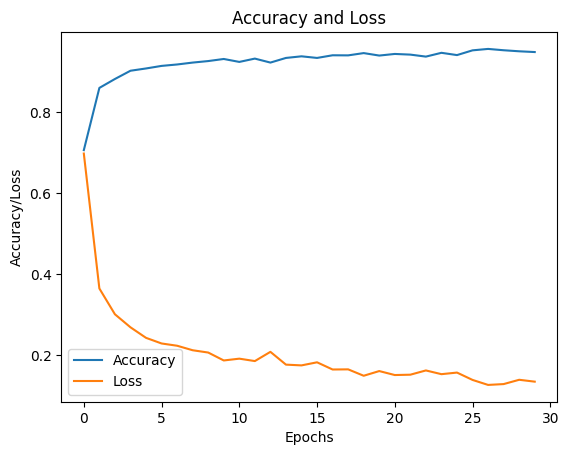

In [14]:
#graph for the loss and accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])
plt.plot(his.history['loss'])
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()


In [15]:
print(his.history['val_loss'])
his.history['val_accuracy']

[0.544431746006012, 0.23190180957317352, 0.2324790507555008, 0.20070092380046844, 0.18937385082244873, 0.18272389471530914, 0.17242750525474548, 0.2163829654455185, 0.27081072330474854, 0.26215294003486633, 0.19629862904548645, 0.17376607656478882, 0.24629586935043335, 0.2913420796394348, 0.23308144509792328, 0.23529307544231415, 0.27440768480300903, 0.28832948207855225, 0.20698724687099457, 0.17494794726371765, 0.1627008467912674, 0.1654326617717743, 0.19256485998630524, 0.22880548238754272, 0.2334885448217392, 0.19482271373271942, 0.30919674038887024, 0.27204129099845886, 0.2774254083633423, 0.2930861711502075]


[0.7682437896728516,
 0.9061748385429382,
 0.9069767594337463,
 0.9222133159637451,
 0.9270248413085938,
 0.9350441098213196,
 0.9358460307121277,
 0.9125902056694031,
 0.8957498073577881,
 0.9037690162658691,
 0.9230152368545532,
 0.9374498724937439,
 0.8989574909210205,
 0.8877305388450623,
 0.9085806012153625,
 0.9005613327026367,
 0.902967095375061,
 0.8997594118118286,
 0.9294306039810181,
 0.931034505367279,
 0.9454691410064697,
 0.9414594769477844,
 0.9278267621994019,
 0.9125902056694031,
 0.9133921265602112,
 0.92862868309021,
 0.8957498073577881,
 0.9053729176521301,
 0.9069767594337463,
 0.9061748385429382]

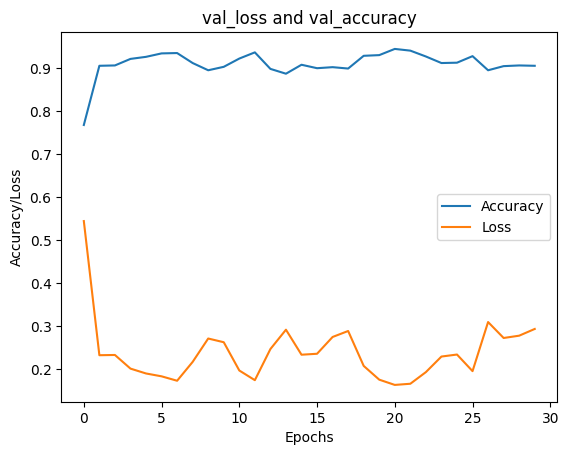

In [16]:
#graph for the validation loss and validation accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(his.history['val_accuracy'])
plt.plot(his.history['val_loss'])
plt.title('val_loss and val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()


##**test the model**

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [18]:
# !pip install tensorflow
import tensorflow as tf

In [19]:
# testing 1
img = image.load_img(r'C:\Users\91830\Documents\dl_project\Data\test\COVID19\COVID19(460).jpg',target_size =(64,64))

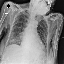

In [20]:
img

In [21]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['COVID19','NORMAL','PNEUMONIA']
op[pred]

1/1 [==============================] - 0s 83ms/step


'NORMAL'

13/13 [==============================] - 8s 641ms/step


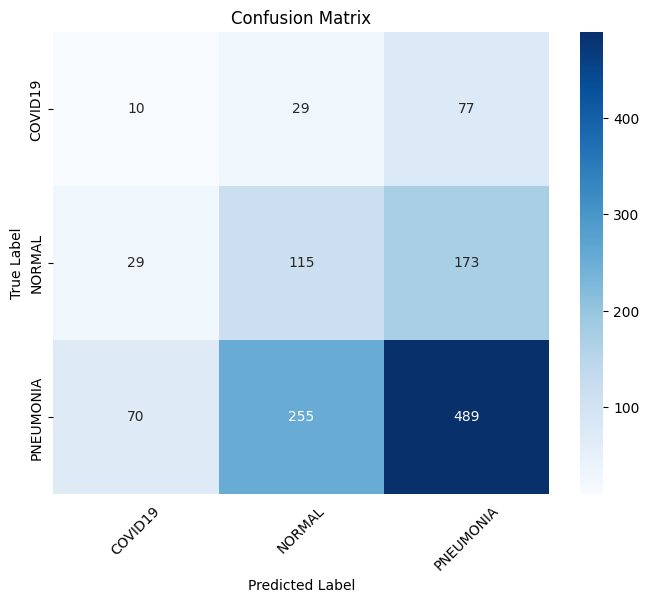

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
true_labels = x_test.classes
predicted_labels = np.argmax(model.predict(x_test), axis=1)

# Get the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)


# Create confusion matrix using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
                 xticklabels=op, yticklabels=op)  # Customize labels and format

# Customize title and remove unnecessary elements
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.xticks(rotation=45)  
plt.tick_params(bottom=False)  
plt.show()

F1 Score: 0.5010074601385217
Recall: 0.49238171611868486
Precision: 0.513741773960924


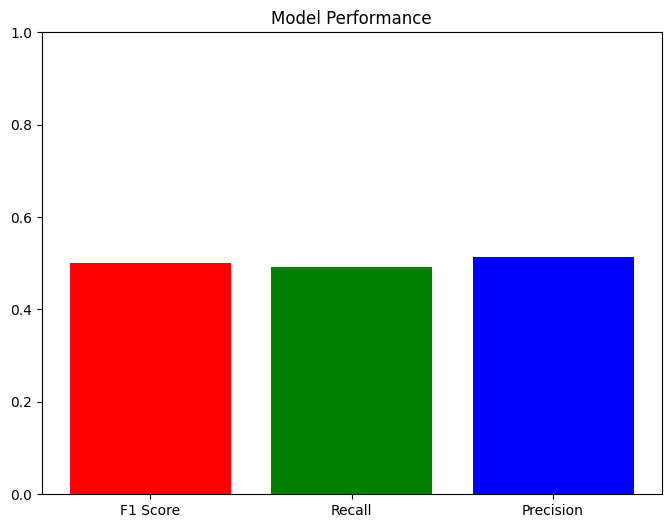

[[ 10  29  77]
 [ 29 115 173]
 [ 70 255 489]]


In [27]:
#f1 score, recall, precision code for the above and  plots for above model

# Calculate the F1 score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

f1 = f1_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Print the results
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)

# Plot the F1 score, recall, and precision
plt.figure(figsize=(8, 6))
plt.bar(np.arange(3), [f1, recall, precision], color=['red', 'green', 'blue'])
plt.xticks(np.arange(3), ['F1 Score', 'Recall', 'Precision'])
plt.ylim(0, 1)
plt.title('Model Performance')
plt.show()

print(cm)


##**evaluating a cnn model**

In [ ]:
model.evaluate(x_test)

49/49 [==============================] - 69s 1s/step - loss: 0.2052 - accuracy: 0.9227


[0.20522214472293854, 0.9227122664451599]

##**implementing transfer learning using vgg16**

In [29]:
trainpath = r'C:\Users\91830\Documents\dl_project\Data\train'
testpath = r'C:\Users\91830\Documents\dl_project\Data\test'


In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 16)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 16)


Found 4271 images belonging to 3 classes.
Found 1247 images belonging to 3 classes.


In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [34]:
vgg = VGG16(include_top = False,input_shape = (224,224,3))

58889256/58889256 [==============================] - 62s 1us/step


In [35]:
for layer in vgg.layers:
  print(layer)


In [36]:
len(vgg.layers)

19

In [37]:
for layer in vgg.layers:
  layer.trainable = False

In [38]:
x= Flatten()(vgg.output)

In [39]:
output = Dense(3, activation ='softmax')(x)

In [40]:
vgg16 = Model(vgg.input,output)


In [41]:
vgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
vgg16.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [43]:
his1=vgg16.fit(train,validation_data=test,epochs=10,steps_per_epoch=len(train),validation_steps =len(test))

Epoch 1/10
267/267 [==============================] - 542s 2s/step - loss: 0.2993 - accuracy: 0.8972 - val_loss: 0.1960 - val_accuracy: 0.9214
Epoch 2/10
267/267 [==============================] - 531s 2s/step - loss: 0.1609 - accuracy: 0.9436 - val_loss: 0.1436 - val_accuracy: 0.9447
Epoch 3/10
267/267 [==============================] - 516s 2s/step - loss: 0.1404 - accuracy: 0.9534 - val_loss: 0.2083 - val_accuracy: 0.9334
Epoch 4/10
267/267 [==============================] - 513s 2s/step - loss: 0.1304 - accuracy: 0.9532 - val_loss: 0.1215 - val_accuracy: 0.9559
Epoch 5/10
267/267 [==============================] - 524s 2s/step - loss: 0.1301 - accuracy: 0.9560 - val_loss: 0.2264 - val_accuracy: 0.9254
Epoch 6/10
267/267 [==============================] - 526s 2s/step - loss: 0.1067 - accuracy: 0.9639 - val_loss: 0.2426 - val_accuracy: 0.9230
Epoch 7/10
267/267 [==============================] - 525s 2s/step - loss: 0.1001 - accuracy: 0.9672 - val_loss: 0.1739 - val_accuracy: 0.9431

In [44]:
print(his1.history['loss'])
his1.history['accuracy']

[0.2993314862251282, 0.16086678206920624, 0.14044888317584991, 0.1304207295179367, 0.13005298376083374, 0.106687530875206, 0.10011495649814606, 0.09358999878168106, 0.08571472018957138, 0.08987732976675034]


[0.8972137570381165,
 0.9435729384422302,
 0.9534066915512085,
 0.9531725645065308,
 0.9559822082519531,
 0.9639428853988647,
 0.9672207832336426,
 0.9662842154502869,
 0.9679232239723206,
 0.9709669947624207]

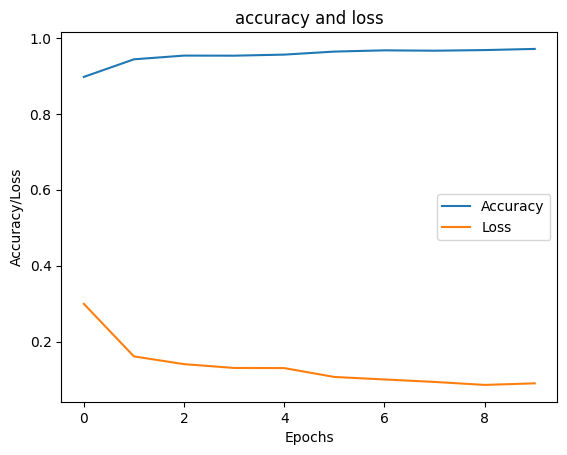

In [45]:
# graph for the loss and accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(his1.history['accuracy'])
plt.plot(his1.history['loss'])
plt.title('accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()


In [46]:
print(his1.history['val_loss'])
his1.history['val_accuracy']

[0.195963054895401, 0.14360670745372772, 0.20825397968292236, 0.12152601033449173, 0.2264469414949417, 0.24255135655403137, 0.1738712191581726, 0.5203267931938171, 0.4124397039413452, 0.287417471408844]


[0.921411395072937,
 0.9446672201156616,
 0.9334402680397034,
 0.9558941721916199,
 0.9254209995269775,
 0.9230152368545532,
 0.9430633783340454,
 0.8797113299369812,
 0.8989574909210205,
 0.9222133159637451]

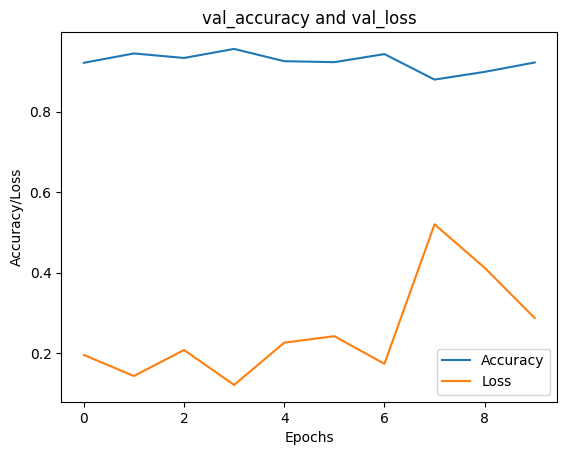

In [47]:
# graph for the loss and accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(his1.history['val_accuracy'])
plt.plot(his1.history['val_loss'])
plt.title('val_accuracy and val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()


In [81]:
#testing the above vvg16 model by taking any random image

from keras.applications.vgg16 import preprocess_input

# Load the image
img = image.load_img(r'C:\Users\91830\Documents\dl_project\Data\test\COVID19\COVID19(465).jpg', target_size=(224, 224))

# Preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = vgg16.predict(x)

# Print the predicted class
op = ['COVID19', 'NORMAL', 'PNEUMONIA']
print('Predicted class:', op[np.argmax(predictions)])


1/1 [==============================] - 0s 260ms/step
Predicted class: COVID19


78/78 [==============================] - 134s 2s/step


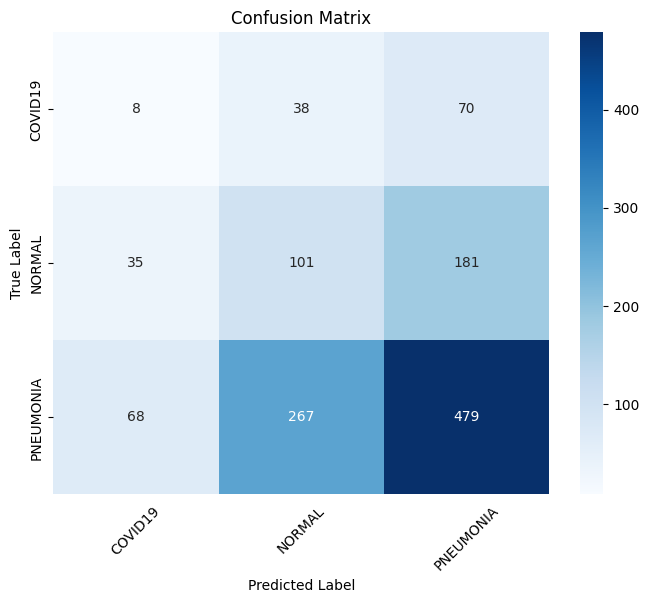

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
true_labels1= test.classes
predicted_labels1= np.argmax(vgg16.predict(test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels1, predicted_labels1)


# Get the confusion matrix
cm = confusion_matrix(true_labels1, predicted_labels1)


# Create confusion matrix using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
                 xticklabels=op, yticklabels=op)  # Customize labels and format

# Customize title and remove unnecessary elements
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.xticks(rotation=45)  
plt.tick_params(bottom=False)  
plt.show()

##**implementing resNET50**

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [51]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

94765736/94765736 [==============================] - 101s 1us/step


In [52]:
resnet_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 3)                 1539      
 apper)                                                          
                                                                 
Total params: 24638339 (93.99 MB)
Trainable params: 1050627 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [53]:
from keras.models import Model
from keras.layers import Dense

In [54]:
resnet_model.layers.pop()

In [55]:
output_layer = Dense(3, activation='softmax')(resnet_model.layers[-1].output)

In [56]:
model = Model(inputs=resnet_model.input, outputs=output_layer)

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
hi2=model.fit(train, validation_data=test, epochs=10, steps_per_epoch=len(train), validation_steps=len(test))

Epoch 1/10
267/267 [==============================] - 239s 892ms/step - loss: 0.9845 - accuracy: 0.5959 - val_loss: 0.8865 - val_accuracy: 0.6528
Epoch 2/10
267/267 [==============================] - 271s 1s/step - loss: 0.9286 - accuracy: 0.5959 - val_loss: 0.8629 - val_accuracy: 0.6528
Epoch 3/10
267/267 [==============================] - 261s 979ms/step - loss: 0.9136 - accuracy: 0.5959 - val_loss: 0.8564 - val_accuracy: 0.6528
Epoch 4/10
267/267 [==============================] - 258s 965ms/step - loss: 0.9101 - accuracy: 0.5959 - val_loss: 0.8555 - val_accuracy: 0.6528
Epoch 5/10
267/267 [==============================] - 248s 927ms/step - loss: 0.9094 - accuracy: 0.5959 - val_loss: 0.8551 - val_accuracy: 0.6528
Epoch 6/10
267/267 [==============================] - 247s 927ms/step - loss: 0.9092 - accuracy: 0.5959 - val_loss: 0.8544 - val_accuracy: 0.6528
Epoch 7/10
267/267 [==============================] - 250s 936ms/step - loss: 0.9092 - accuracy: 0.5959 - val_loss: 0.8544 - va

In [60]:
print(hi2.history['loss'])
hi2.history['accuracy']

[0.9844538569450378, 0.9286057949066162, 0.9136235117912292, 0.9101048111915588, 0.9093577861785889, 0.9092159271240234, 0.9091720581054688, 0.909175455570221, 0.9091443419456482, 0.9092586040496826]


[0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665,
 0.5958791971206665]

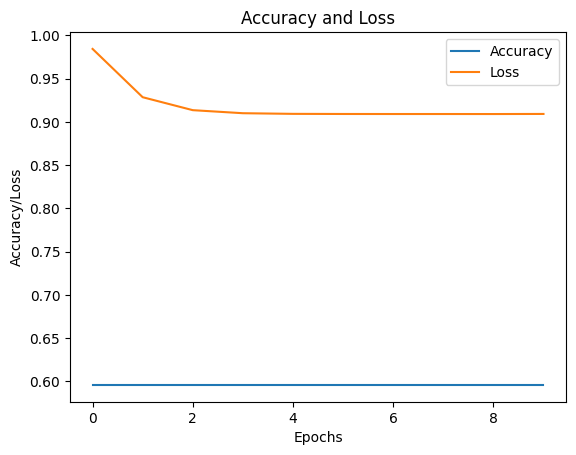

In [61]:
# graph for the loss and accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(hi2.history['accuracy'])
plt.plot(hi2.history['loss'])
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()


In [62]:
print(hi2.history['val_loss'])
hi2.history['val_accuracy']

[0.8864517211914062, 0.8629119992256165, 0.8564261198043823, 0.8554609417915344, 0.8551284670829773, 0.8544376492500305, 0.8543826341629028, 0.8537134528160095, 0.8545057773590088, 0.8553473353385925]


[0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814,
 0.6527666449546814]

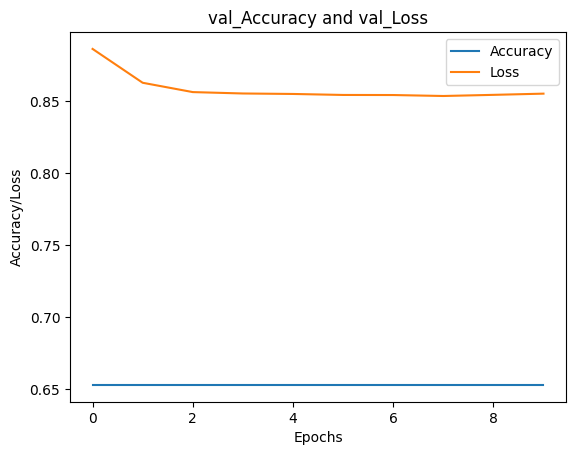

In [63]:
# graph for the validation loss and validation accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(hi2.history['val_accuracy'])
plt.plot(hi2.history['val_loss'])
plt.title('val_Accuracy and val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()

78/78 [==============================] - 55s 685ms/step


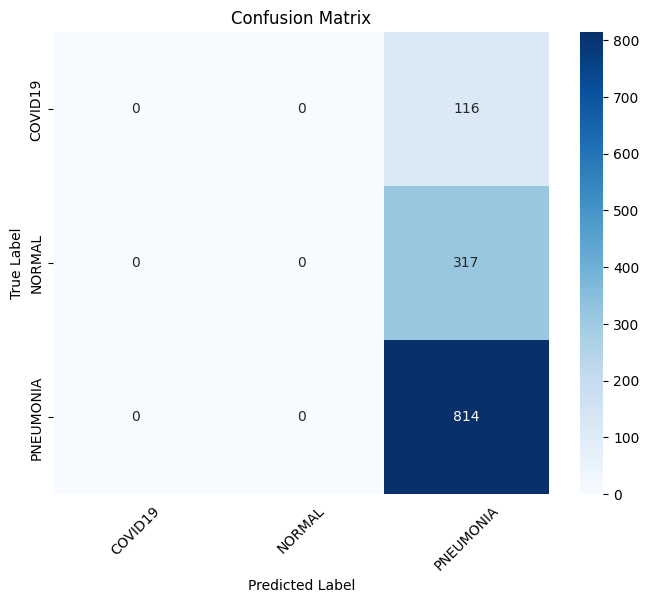

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
true_labels2 = test.classes
predicted_labels2 = np.argmax(model.predict(test), axis=1)

# Get the confusion matrix
cm = confusion_matrix(true_labels2, predicted_labels2)


# Create confusion matrix using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
                 xticklabels=op, yticklabels=op)  # Customize labels and format

# Customize title and remove unnecessary elements
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.xticks(rotation=45)  
plt.tick_params(bottom=False)  
plt.show()


##**implementation of InceptionV3**

In [66]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D


In [68]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  # crawls inside folders
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir =r"C:\Users\91830\Documents\dl_project\Data\train"
test_dir=r"C:\Users\91830\Documents\dl_project\Data\test"

In [69]:
 #train file image count
train_samples =get_files(train_dir)
#to get tags
num_classes=len(glob.glob(train_dir+"/*"))
#test file image count
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

3 Classes
4271 Train images
1247 Test images


In [70]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 92s 1us/step


In [71]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(3, activation='softmax')(x)
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)
# View the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d_1[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [72]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 4271 images belonging to 3 classes.
Found 1247 images belonging to 3 classes.


In [73]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)


Found 1247 images belonging to 3 classes.


In [74]:
# Defining the cost and model optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/5
134/134 [==============================] - 166s 1s/step - loss: 1.7730 - accuracy: 0.8448 - val_loss: 0.5544 - val_accuracy: 0.9246 - lr: 0.0010
Epoch 2/5
134/134 [==============================] - 176s 1s/step - loss: 0.8543 - accuracy: 0.8991 - val_loss: 2.8413 - val_accuracy: 0.7763 - lr: 0.0010
Epoch 3/5
134/134 [==============================] - 176s 1s/step - loss: 0.8262 - accuracy: 0.9166 - val_loss: 0.8187 - val_accuracy: 0.9158 - lr: 0.0010
Epoch 4/5
134/134 [==============================] - 170s 1s/step - loss: 0.6523 - accuracy: 0.9258 - val_loss: 0.7102 - val_accuracy: 0.9254 - lr: 0.0010
Epoch 5/5
134/134 [==============================] - 164s 1s/step - loss: 0.3620 - accuracy: 0.9501 - val_loss: 0.4158 - val_accuracy: 0.9391 - lr: 3.0000e-04


In [75]:
print(history4.history['loss'])
history4.history['accuracy']

[1.7730369567871094, 0.8543025255203247, 0.8261560797691345, 0.6522552371025085, 0.3619728982448578]


[0.8447670340538025,
 0.8990868926048279,
 0.9166471362113953,
 0.9257785081863403,
 0.9501287937164307]

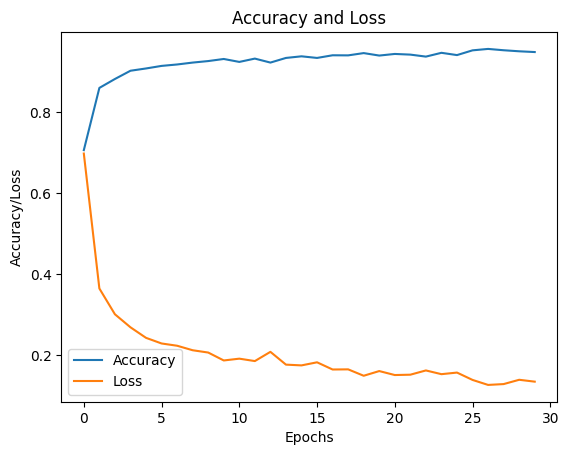

In [76]:
# graph for the loss and accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])
plt.plot(his.history['loss'])
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()


In [77]:
print(history4.history['val_loss'])
history4.history['val_accuracy']

[0.5543560981750488, 2.8413312435150146, 0.8187432885169983, 0.710151195526123, 0.415812611579895]


[0.9246190786361694,
 0.7762630581855774,
 0.9157978892326355,
 0.9254209995269775,
 0.9390537142753601]

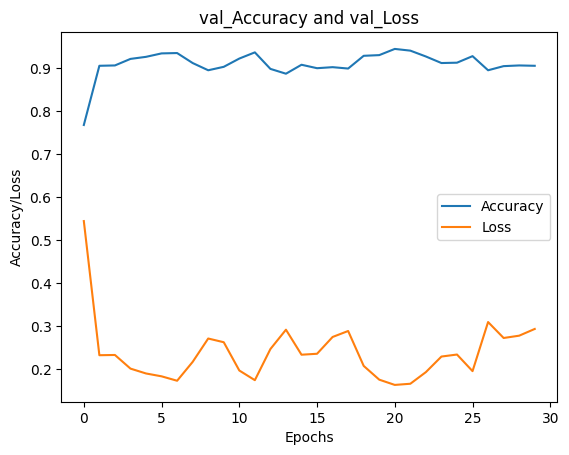

In [78]:
# graph for the validation loss and validation accuracy with x-axis as epochs and y-axis as accuracy
import matplotlib.pyplot as plt
plt.plot(his.history['val_accuracy'])
plt.plot(his.history['val_loss'])
plt.title('val_Accuracy and val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()

78/78 [==============================] - 34s 417ms/step


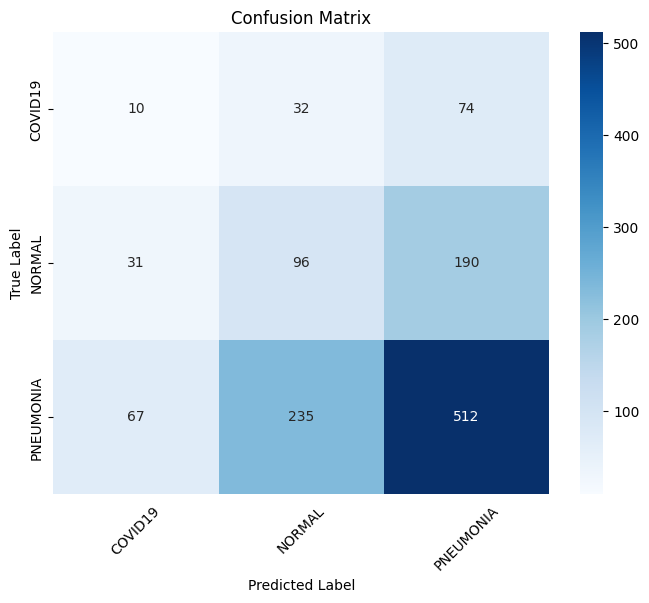

In [79]:


import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
true_labels3 = test.classes
predicted_labels3 = np.argmax(model.predict(test), axis=1)

# Get the confusion matrix
cm = confusion_matrix(true_labels3, predicted_labels3)


# Create confusion matrix using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
                 xticklabels=op, yticklabels=op)  # Customize labels and format

# Customize title and remove unnecessary elements
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.xticks(rotation=45)  
plt.tick_params(bottom=False)  
plt.show()


CNN Model:
F1 Score: 0.5010074601385217
Precision: 0.513741773960924
Recall: 0.49238171611868486
VGG16 Model:
F1 Score: 0.4826005441462698
Precision: 0.4982660581322121
Recall: 0.4715316760224539
ResNet50 Model:
F1 Score: 0.5156254681298192
Precision: 0.42610428621313445
Recall: 0.652766639935846
InceptionV3 Model:
F1 Score: 0.5004807563733003
Precision: 0.5065337742044876
Recall: 0.4955894145950281


c:\Users\91830\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


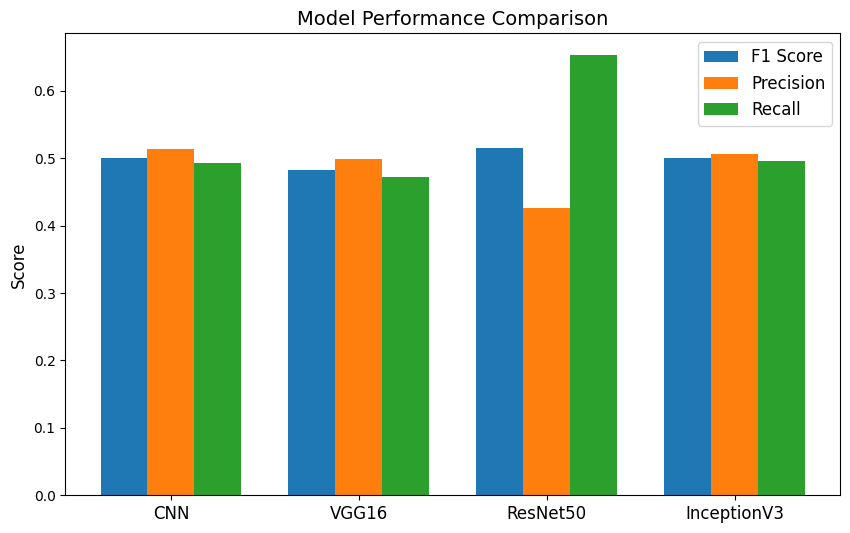

In [80]:


# **F1 Score, Precision, and Recall for CNN Model:**
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate the F1 score, precision, and recall for the CNN model
f1_cnn = f1_score(true_labels, predicted_labels, average='weighted')
precision_cnn = precision_score(true_labels, predicted_labels, average='weighted')
recall_cnn = recall_score(true_labels, predicted_labels, average='weighted')

# Print the results
print('CNN Model:')
print('F1 Score:', f1_cnn)
print('Precision:', precision_cnn)
print('Recall:', recall_cnn)

# **F1 Score, Precision, and Recall for VGG16 Model:**

# Calculate the F1 score, precision, and recall for the VGG16 model
f1_vgg16 = f1_score(true_labels1, predicted_labels1, average='weighted')
precision_vgg16 = precision_score(true_labels1, predicted_labels1, average='weighted')
recall_vgg16 = recall_score(true_labels1, predicted_labels1, average='weighted')

# Print the results
print('VGG16 Model:')
print('F1 Score:', f1_vgg16)
print('Precision:', precision_vgg16)
print('Recall:', recall_vgg16)

# **F1 Score, Precision, and Recall for ResNet50 Model:**

# Calculate the F1 score, precision, and recall for the ResNet50 model
f1_resnet50 = f1_score(true_labels2, predicted_labels2, average='weighted')
precision_resnet50 = precision_score(true_labels2, predicted_labels2, average='weighted')
recall_resnet50 = recall_score(true_labels2, predicted_labels2, average='weighted')

# Print the results
print('ResNet50 Model:')
print('F1 Score:', f1_resnet50)
print('Precision:', precision_resnet50)
print('Recall:', recall_resnet50)

# **F1 Score, Precision, and Recall for InceptionV3 Model:**

# Calculate the F1 score, precision, and recall for the InceptionV3 model
f1_inceptionv3 = f1_score(true_labels3, predicted_labels3, average='weighted')
precision_inceptionv3 = precision_score(true_labels3, predicted_labels3, average='weighted')
recall_inceptionv3 = recall_score(true_labels3, predicted_labels3, average='weighted')

# Print the results
print('InceptionV3 Model:')
print('F1 Score:', f1_inceptionv3)
print('Precision:', precision_inceptionv3)
print('Recall:', recall_inceptionv3)

# **Plot the Results:**

# Create a bar chart to compare the F1 scores, precision, and recall for each model
models = ['CNN', 'VGG16', 'ResNet50', 'InceptionV3']
f1_scores = [f1_cnn, f1_vgg16, f1_resnet50, f1_inceptionv3]
precision_scores = [precision_cnn, precision_vgg16, precision_resnet50, precision_inceptionv3]
recall_scores = [recall_cnn, recall_vgg16, recall_resnet50, recall_inceptionv3]

x = np.arange(len(models))  # Positions of the bars
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, f1_scores, width, label='F1 Score')
rects2 = ax.bar(x, precision_scores, width, label='Precision')
rects3 = ax.bar(x + width, recall_scores, width, label='Recall')

# Add labels, title, and legend
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)

plt.show()
